In [1]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import missingno
import re


In [3]:
#importing data
transaction_data=pd.read_excel('QVI_transaction_data.xlsx')
customer_data=pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data.head()



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


<AxesSubplot:>

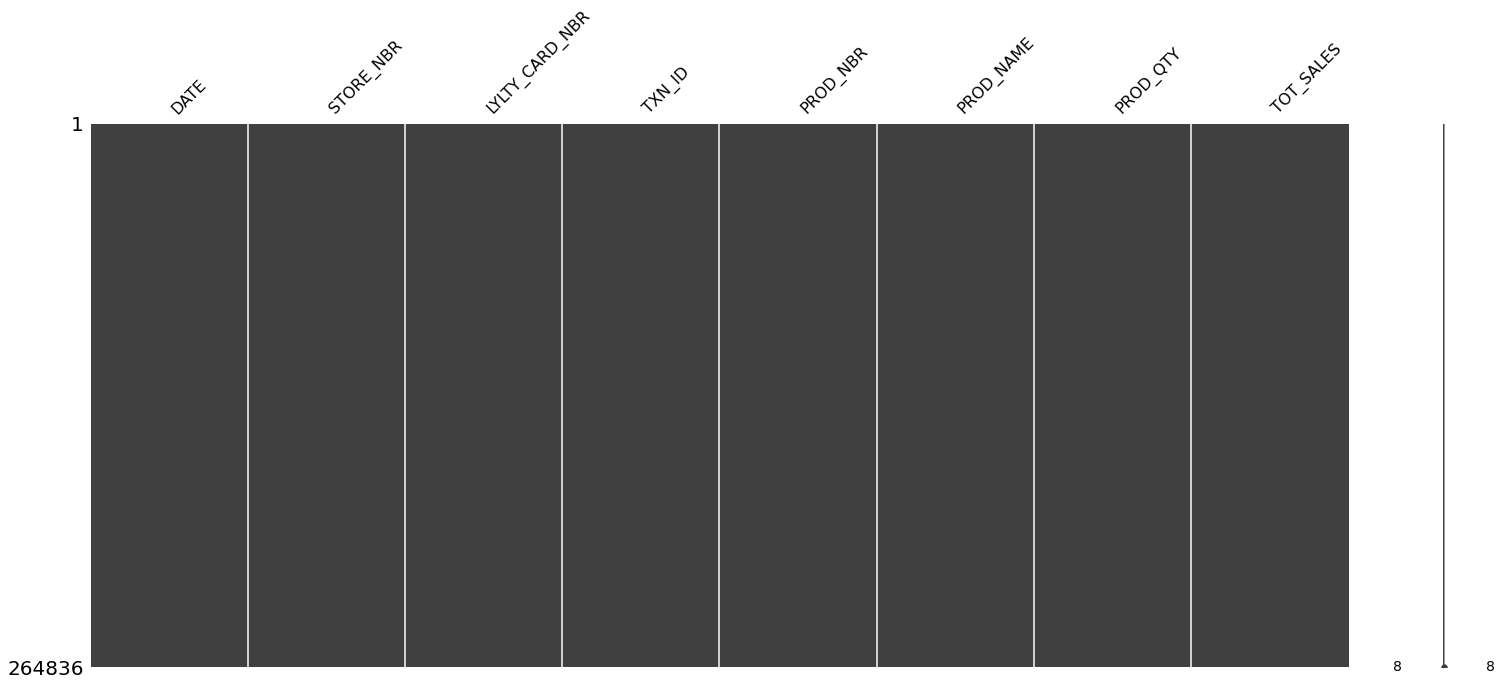

In [4]:
#finding missing values
missingno.matrix(transaction_data)
#conclusion- NO missing data found


In [5]:
#creating new column for Pack size
transaction_data['PCK_SIZE']=transaction_data['PROD_NAME'].str.extract("(\d+)")
transaction_data['PCK_SIZE']=pd.to_numeric(transaction_data['PCK_SIZE'])
transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [6]:
#creating new column for brand
part=transaction_data['PROD_NAME'].str.partition()
transaction_data['BRAND']=part[0]
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [7]:
transaction_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [8]:
transaction_data['BRAND'].replace('NCC','Natural',inplace = True )
transaction_data['BRAND'].replace('Dorito','Doritos',inplace= True)
transaction_data['BRAND'].replace('Infzns','Infuzions',inplace = True)
transaction_data['BRAND'].replace(['RRD','Red'],'Red Rock Delli',inplace=True)
transaction_data['BRAND'].replace('WW','Woolworths', inplace=True)
transaction_data['BRAND'].replace('Smith','Smiths',inplace = True )
transaction_data['BRAND'].replace(['Grain','GrnWves'],'Grainwaves',inplace= True)
transaction_data['BRAND'].replace('Snbts','Sunbites',inplace= True)
transaction_data['BRAND'].replace('CCs','CCS',inplace= True)
transaction_data['BRAND'].unique()


array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Delli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [9]:
#cleaning Product Name
def clear_text(text):
    text=re.sub('[&/]',' ',text)
    text=re.sub('\d\w*',' ',text)
    return text
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].apply(clear_text)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [10]:
transaction_data[transaction_data['PROD_NAME'].str.contains('Salsa', regex=False)]
#find out products that have "Salsa" in Product name

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa Mzzrlla,2,5.4,150,Red Rock Delli
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa,1,2.6,150,Smiths
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium,1,2.6,300,Doritos
...,...,...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med,1,5.1,300,Old
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa,1,1.5,300,Woolworths
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa,1,2.6,150,Smiths
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild,1,2.6,300,Doritos


In [11]:
transaction_data=transaction_data[~transaction_data['PROD_NAME'].str.contains('Salsa', regex=False)]
transaction_data[transaction_data['PROD_NAME'].str.contains('Salsa', regex=False)]
#Removed Products with salsa in Product name

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND


In [12]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [13]:
#outlier Detection
#outliers are most likely to be present in PROD_QTY and TOT_SALES because they are real world Metrics
#lets check
transaction_data['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [14]:
freq=dict(transaction_data['PROD_QTY'].value_counts())
freq

{2: 220070, 1: 25476, 5: 415, 3: 408, 4: 371, 200: 2}

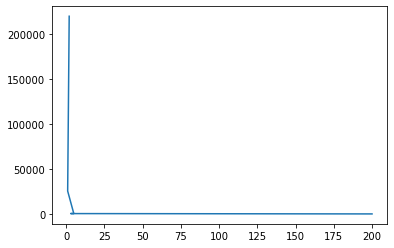

In [15]:
plt.plot(freq.keys(),freq.values())


In [16]:
transaction_data.loc[transaction_data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos


In [17]:
transaction_data.loc[transaction_data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos


In [18]:
transaction_data.drop(transaction_data[transaction_data['LYLTY_CARD_NBR']==226000].index, inplace=True)
#removed outliers in transaction data

In [19]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [20]:
transaction_data.shape

(246740, 10)

In [21]:
sales=pd.pivot_table(transaction_data,values='TOT_SALES',index='DATE',aggfunc='sum')
sales.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


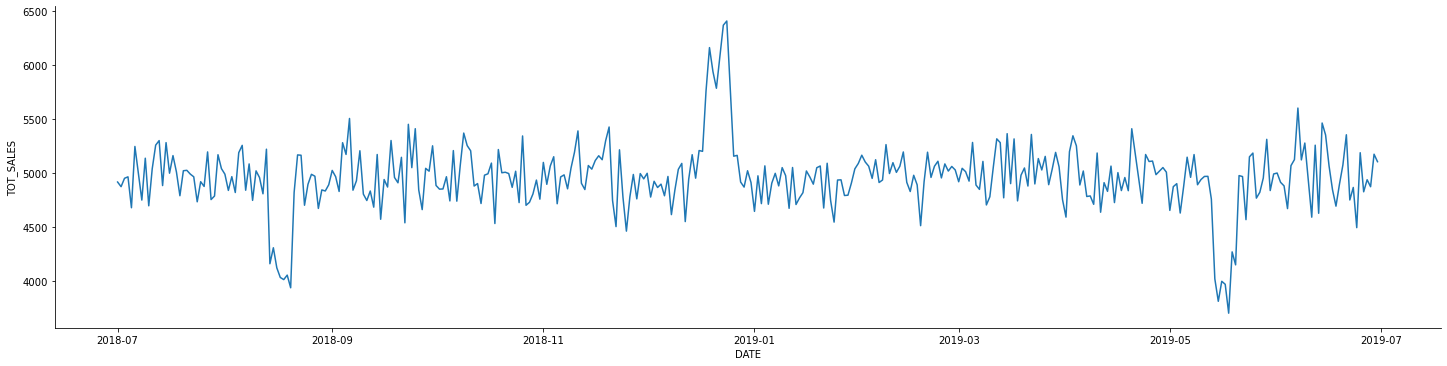

In [22]:
#plotting day-wise sales data 
sbn.relplot(x='DATE',y='TOT_SALES',aspect=4,kind='line',data=sales)

In [23]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [24]:
transaction_data=transaction_data.merge(right=customer_data,on='LYLTY_CARD_NBR');
transaction_data['LYLTY_CARD_NBR'].nunique();

In [25]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PCK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [26]:
customer_total_purchase=pd.pivot_table(transaction_data,values='TOT_SALES',index='LYLTY_CARD_NBR',aggfunc='sum');

In [27]:
customer_total_purchase=customer_total_purchase.merge(right=customer_data,on='LYLTY_CARD_NBR')

In [28]:
#average basket value of customers 
customer_total_purchase["TOT_SALES"].mean()

25.32267734650015

<AxesSubplot:xlabel='count', ylabel='PREMIUM_CUSTOMER'>

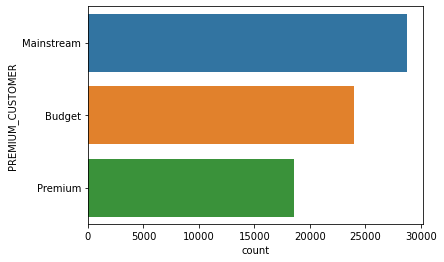

In [40]:
customer_total_purchase["PREMIUM_CUSTOMER"].value_counts()
sbn.countplot(y=customer_total_purchase['PREMIUM_CUSTOMER'],order=customer_total_purchase['PREMIUM_CUSTOMER'].value_counts().index)


<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

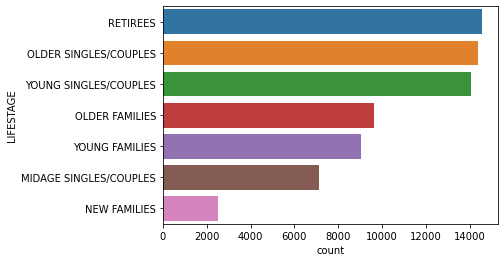

In [35]:
#market segmentation
sbn.countplot(y=customer_total_purchase['LIFESTAGE'],order=customer_total_purchase['LIFESTAGE'].value_counts().index)
#biggest market segment is Retirees followed by Older and Newer Singles/Couples

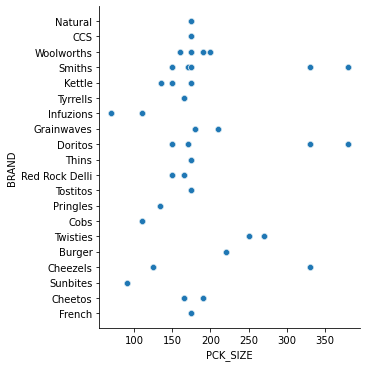

In [39]:
#lets look at purchase behaviour by brand and pack_size of these people
#its evident from the data that which companies and which pack_sizes are ost frequently bought
sbn.relplot(x='PCK_SIZE',y='BRAND',data=transaction_data)

In [41]:
sales=pd.DataFrame(transaction_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum())
sales.sort_values(by='TOT_SALES',ascending=False,inplace=True)

In [42]:
sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123537.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           75242.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
Mainstream       NEW FAMILIES             15979.70
Premium          NEW FAMILIES             10760.80

In [60]:
sales=pd.DataFrame(transaction_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())


<AxesSubplot:title={'center':'total sales by market segment'}, xlabel='LIFESTAGE'>

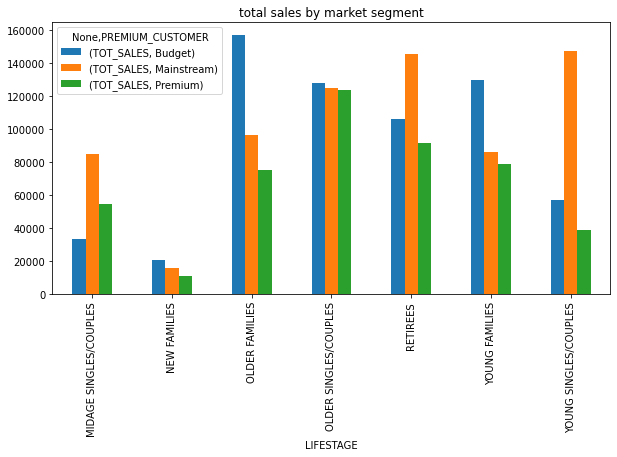

In [64]:
sales.unstack().plot(kind='bar' , figsize=(10,5),title='total sales by market segment')

<AxesSubplot:xlabel='LIFESTAGE'>

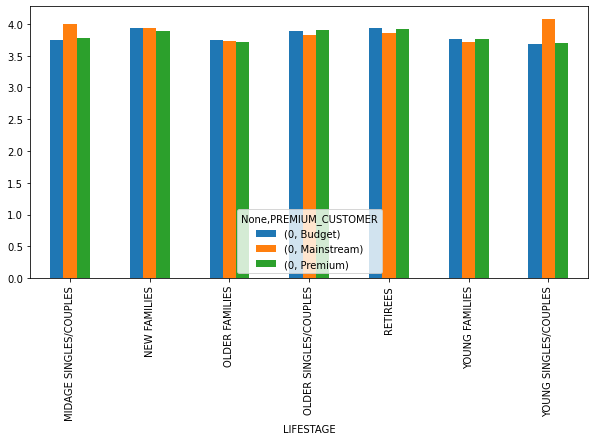

In [72]:
#average value of transaction by each segment
avg_purchase=pd.DataFrame(transaction_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum()/transaction_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum())
avg_purchase.unstack().plot(kind='bar',figsize=(10,5))
#mainstream midage singles/couples and young singles/couples purchase high vlaue chips packets
